## Evaluating PINN accuracy

#### Defining the problem:
$$\frac{d}{dt}u(x,t)=\alpha\frac{d^2}{dx^2}u(x,t)$$

$$x\in[0,1]$$

Initial and boundary conditions:

$$u(x,0) = \sin(\pi x) + 1 - x$$

$$u(0,t) = 1$$

$$u(1,t) = 0$$

#### Boundary conditions are enforced with a hard constraint:
* Model is defined as $u_\theta(x,t)=\sin(x)g_\theta(x,t)$
* $g_\theta(x,t)$ is a multilayer perceptron with parameters $\theta$.
* The $\sin(x)$ factor enforces the boundary condition.

In [1]:
import numpy as np
import torch
from model_architecture import PINN
import matplotlib.pyplot as plt

# PDE parameters
alpha = 0.1  # Thermal diffusivity
x_range = (0, 1)
t_range = (0, 1)

# Loading model with trained weights
model = PINN()
model.load_state_dict(torch.load('weights1.pth'))
model.eval()

PINN(
  (net): Sequential(
    (0): Linear(in_features=2, out_features=20, bias=True)
    (1): Tanh()
    (2): Linear(in_features=20, out_features=20, bias=True)
    (3): Tanh()
    (4): Linear(in_features=20, out_features=20, bias=True)
    (5): Tanh()
    (6): Linear(in_features=20, out_features=1, bias=True)
  )
)

In [2]:
# Exact solution
def u_exact(x, t):
    return np.sin(np.pi*x) * np.exp(-t*alpha*np.pi**2) + np.sin(2*np.pi*x) * np.exp(-4*t*alpha*np.pi**2)

In [3]:
# Computing model prediction
xs = torch.linspace(x_range[0], x_range[1], 100)
ts = torch.linspace(t_range[0], t_range[1], 100)
x_mesh, t_mesh = torch.meshgrid(xs, ts, indexing='ij')
x_flat = x_mesh.reshape(-1, 1)
t_flat = t_mesh.reshape(-1, 1)

with torch.no_grad():
    u_pred = model(x_flat, t_flat).reshape(x_mesh.shape)

# Computing exact solution
u_true = u_exact(x_mesh, t_mesh)

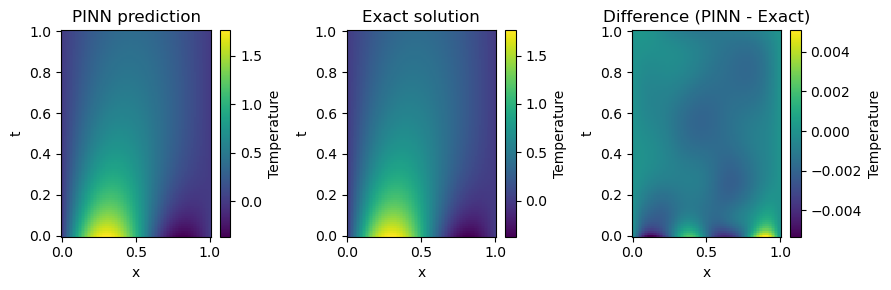

In [4]:
# Plotting PINN solution and exact solution

plt.figure(figsize=(9, 3))

plt.subplot(1,3,1)
plt.pcolormesh(x_mesh, t_mesh, u_pred)
plt.colorbar(label='Temperature')
plt.xlabel('x')
plt.ylabel('t')
plt.title('PINN prediction')

plt.subplot(1,3,2)
plt.pcolormesh(x_mesh, t_mesh, u_true)
plt.colorbar(label='Temperature')
plt.xlabel('x')
plt.ylabel('t')
plt.title('Exact solution')

plt.subplot(1,3,3)
plt.pcolormesh(x_mesh, t_mesh, u_pred - u_true)
plt.colorbar(label='Temperature')
plt.xlabel('x')
plt.ylabel('t')
plt.title('Difference (PINN - Exact)')


plt.tight_layout()

**The PINN is quite accurate (note the Temperature scale on the righthand plot).**